### Enunciado
A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a **murder** that occurred sometime on **Jan.15, 2018** and that it took place in **SQL City**. Start by retrieving the corresponding crime scene report from the police department’s database.


### Modelo de datos
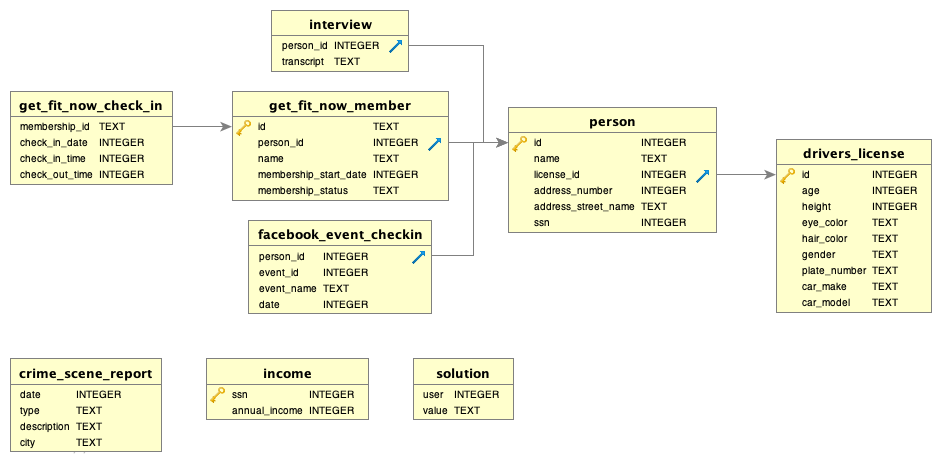




# Solución Noelia

In [156]:
import pandas as pd
import sqlite3 as sq

In [157]:
# Connect to the database
conn = sq.connect('./Data/sql-murder-mystery.db')

# Get a cursor to use for queries
cursor = conn.cursor()

In [158]:
# This function reads the data and passes it to a Pandas DataFrame.
def sql_query(query):

    # Run the query
    cursor.execute(query)

    # Stores query data 
    ans = cursor.fetchall()

    # Gets the names of the columns in the table
    names = [description[0] for description in cursor.description]
    
    return pd.DataFrame(ans, columns = names)

In [159]:
query = '''
SELECT *
FROM crime_scene_report
WHERE (type == "murder") AND (date == 20180115) AND (city = "SQL City")
'''

sql_query(query)

# Complete description: Security footage shows that there were 2 witnesses. The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel, lives somewhere on "Franklin Ave"

,date,type,description,city
0,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [160]:
query = '''
SELECT
       A.id, A.name, A.address_number, A.address_street_name,
       B.transcript
FROM person AS A
JOIN interview AS B
ON A.id = B.person_id
WHERE (address_street_name LIKE "Northwestern Dr") OR ((name LIKE "Annabel%") AND (address_street_name LIKE "Franklin Ave"))
ORDER BY 3 DESC
'''

df_possible_witnesses = sql_query(query)
df_possible_witnesses

,id,name,address_number,address_street_name,transcript
0,14887,Morty Schapiro,4919,Northwestern Dr,I heard a gunshot and then saw a man run out. ...
1,73368,Torie Thalmann,3697,Northwestern Dr,doesn’t suit my throat!’ and a Canary called o...
2,96595,Coretta Cubie,3631,Northwestern Dr,"head in the lap of her sister, who was gently ..."
3,28360,Rashad Cascone,3212,Northwestern Dr,"for apples, yer honour!’\n"
4,51114,Christena Saffell,3055,Northwestern Dr,"‘So you did, old fellow!’ said the others.\n"
5,68690,Yer Modest,3046,Northwestern Dr,\n
6,34352,Vincenza Burkhardt,2512,Northwestern Dr,"Poor Alice! It was as much as she could do, ly..."
7,80921,Donovan Yackley,2386,Northwestern Dr,\n
8,88423,Teri Ehrich,1879,Northwestern Dr,"sea, some children digging in the sand with wo..."
9,72076,Courtney Bordeaux,1707,Northwestern Dr,"see: four times five is twelve, and four times..."


#### WITNESSES

|id|name|address_number|address_street_name|transcript|
|----------|----------|----------|----------|----------|
|14887|Morty Schapiro|4919|Northwestern Dr|I heard a gunshot and then saw a man run out. He had a "Get Fit Now Gym" bag. The membership number on the bag started with "48Z". Only gold members have those bags. The man got into a car with a plate that included "H42W".|
|16371|Annabel Miller|103|Franklin Ave|I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th.|

In [161]:
# Keep the 2 witnesses

query = '''
SELECT
       A.name, A.id,
       B.transcript
FROM person AS A
JOIN interview AS B
ON A.id = B.person_id
WHERE (A.id = 14887)OR (A.id = 16371)
'''

df_witnesses = sql_query(query)
df_witnesses

,name,id,transcript
0,Morty Schapiro,14887,I heard a gunshot and then saw a man run out. ...
1,Annabel Miller,16371,"I saw the murder happen, and I recognized the ..."


In [162]:
# Following the clues from witness statements:

query = '''
SELECT 
        A.id, A.name, A.license_id,
        B.plate_number,
        C.person_id,
        D.check_in_date,
        E.transcript
        
FROM person AS A
JOIN drivers_license AS B ON A.license_id = B.id
JOIN get_fit_now_member AS C ON A.id = C.person_id
JOIN get_fit_now_check_in AS D ON C.id = D.membership_id
JOIN interview AS E ON A.id = E.person_id

WHERE (D.check_in_date = 20180109)
AND (D.membership_id LIKE "48Z%")
AND (C.membership_status = "gold")
AND (B.plate_number LIKE "%H42W%")
'''

sql_query(query)

,id,name,license_id,plate_number,person_id,check_in_date,transcript
0,67318,Jeremy Bowers,423327,0H42W2,67318,20180109,I was hired by a woman with a lot of money. I ...


In [169]:
# I was hired by a woman with a lot of money. I don't know her name but I
# know she's around 5'5" (65") or 5'7" (67"). She has red hair and she drives
# a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times
# in December 2017.

# According to his statements, although he was the killer,
# he was working for someone... ¿for whom?

query = '''
SELECT 
        A.id, A.name,
        B.height, B.hair_color, B.car_make, B.car_model, 
        C.person_id, C.event_name, C.date,
        D.transcript

FROM person AS A
JOIN drivers_license AS B ON A.license_id = B.id
JOIN facebook_event_checkin AS C ON A.id = C.person_id
JOIN interview AS D ON A.id = D.person_id

WHERE (B.gender = "female")
AND (B.height BETWEEN 65 AND 67)
AND (B.hair_color = "red")
AND (B.car_make = "Tesla")
AND (B.car_model = "Model S")
AND (C.event_name = "SQL Symphony Concert")
AND (C.date BETWEEN 20171201 AND 20171231)
'''
sql_query(query)

,id,name,height,hair_color,car_make,car_model,person_id,event_name,date,transcript


In [167]:
query = '''
SELECT A.id, A.car_make, A.car_model
FROM drivers_license AS A
'''

df = sql_query(query)
print('Tesla' in df['car_make'])
print('Model S' in df['car_model'])

False
False
